In [57]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print(f'matplotlib.__version__ = {matplotlib.__version__}')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)  

matplotlib.__version__ = 3.3.2


In [58]:
inpath = '/MFMDatasets/MFM_bopf/src/multi_predict/results/sortedResults/'
outdir = '/MFMDatasets/MFM_bopf/src/multi_predict/results/sortedResults/summary/'
#out_flag = True
out_flag = False

stat_cols = ['target','period','feats','pred_alg','NTP','NFN','NFP','NTN','precision_1','recall_1','Spec_1',
            'ROC_AUC','PR_AUC','MCC','Fb2_1','base_file']
rename_cols = ['target','period','features','alg','NTP','NFN','NFP','NTN','precision','recall','specificity',
            'ROC_AUC','PR_AUC','MCC','F2','base']

feats = ['Union50', 'All']
algs = ['GB','LR','MLP','RF','SVC','Emb','TFIM']
periods = ['Pre','PI']
targets = ['transfus_yes','trans_loss']
stat = 'MCC'

results_df = pd.DataFrame()
for target in targets:
    for alg in algs:
        for period in periods:
            filename = '-'.join([target, period, alg, stat, 'Results.csv'])
            path = inpath + filename
            temp_df = pd.read_csv(path, header=0, index_col=None, nrows=1, usecols=stat_cols)
            temp_df.columns = rename_cols
            results_df = results_df.append(temp_df)
        
results_df

,target,period,features,alg,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
0,transfus_yes,Pre,Union50,GB,244,35,2467,7254,0.0899,0.8743,0.7462,0.8589,0.1096,0.2298,0.3185,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-Pre-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.75-1-1.0
0,transfus_yes,PI,Union50,GB,223,56,1923,7798,0.1040,0.8008,0.8022,0.8659,0.1194,0.2418,0.3423,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-PI-Union50-RAND-GB-0.05_11_12_50_900_100_7_0.85-1-0.5
0,transfus_yes,Pre,Union50,LR,212,67,2115,7607,0.0911,0.7602,0.7825,0.8309,0.0985,0.2114,0.3079,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-Pre-Union50-RAND-LR-1_None_10000000_7_liblinear-1-0.7
0,transfus_yes,PI,Union50,LR,236,43,2288,7433,0.0933,0.8446,0.7647,0.8542,0.1114,0.2310,0.3236,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-PI-Union50-RAND-LR-0.1_None_10000000_7_liblinear-1-0.7
0,transfus_yes,Pre,Union50,MLP,225,54,2156,7565,0.0943,0.8053,0.7782,0.8522,0.1088,0.2256,0.3212,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-Pre-Union50-RAND-MLP-relu_1.0_[100,50]_500_0_adam-1-1.0"
0,transfus_yes,PI,Union50,MLP,237,42,2369,7352,0.0908,0.8485,0.7563,0.8445,0.0946,0.2268,0.3179,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-PI-Union50-RAND-MLP-relu_1.0_[68,32,16,4]_500_0_adam-1-1.0"
0,transfus_yes,Pre,Union50,RF,237,42,2276,7446,0.0942,0.8491,0.7659,0.8564,0.1027,0.2335,0.3263,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.9
0,transfus_yes,PI,Union50,RF,239,40,2301,7420,0.0941,0.8569,0.7633,0.8619,0.1069,0.2346,0.3268,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-PI-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
0,transfus_yes,Pre,Union50,SVC,224,55,2521,7200,0.0816,0.8034,0.7407,0.8240,0.0941,0.2007,0.2901,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-Pre-Union50-RAND-SVC-100_0_scale_linear_100000000_1_7-1-1.0
0,transfus_yes,PI,Union50,SVC,243,36,2442,7279,0.0905,0.8711,0.7488,0.8518,0.1156,0.2303,0.3196,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0


In [59]:
results_df.sort_values(by=['MCC'], axis=0, inplace=True, ascending=False)
results_df

,target,period,features,alg,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
0,trans_loss,PI,Union50,RF,480,78,2975,6467,0.1389,0.8601,0.6849,0.8283,0.2065,0.2630,0.4219,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
0,trans_loss,PI,Union50,GB,495,62,3182,6260,0.1347,0.8882,0.6630,0.8323,0.2117,0.2624,0.4193,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
0,trans_loss,PI,Union50,Emb,458,100,2957,6485,0.1341,0.8211,0.6868,0.8129,0.1810,0.2458,0.4056,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
0,trans_loss,PI,Union50,MLP,488,70,3351,6091,0.1271,0.8750,0.6451,0.8075,0.1494,0.2454,0.4020,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[64,32,16,8,4]_500_0_lbfgs-1-1.0"
0,trans_loss,PI,Union50,TFIM,481,77,3255,6187,0.1286,0.8613,0.6553,0.8217,0.1941,0.2451,0.4026,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
0,trans_loss,PI,Union50,SVC,494,64,3492,5950,0.1240,0.8859,0.6302,0.8039,0.1585,0.2419,0.3974,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
0,transfus_yes,PI,Union50,GB,223,56,1923,7798,0.1040,0.8008,0.8022,0.8659,0.1194,0.2418,0.3423,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-PI-Union50-RAND-GB-0.05_11_12_50_900_100_7_0.85-1-0.5
0,trans_loss,PI,Union50,LR,462,96,3161,6281,0.1275,0.8279,0.6652,0.8079,0.1631,0.2355,0.3945,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
0,transfus_yes,PI,Union50,RF,239,40,2301,7420,0.0941,0.8569,0.7633,0.8619,0.1069,0.2346,0.3268,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-PI-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
0,transfus_yes,Pre,Union50,RF,237,42,2276,7446,0.0942,0.8491,0.7659,0.8564,0.1027,0.2335,0.3263,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.9


In [60]:
pre_df = results_df[results_df['period'] == 'Pre']
pi_df = results_df[results_df['period'] == 'PI']

In [61]:
pre_df

,target,period,features,alg,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
0,transfus_yes,Pre,Union50,RF,237,42,2276,7446,0.0942,0.8491,0.7659,0.8564,0.1027,0.2335,0.3263,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.9
0,transfus_yes,Pre,Union50,GB,244,35,2467,7254,0.0899,0.8743,0.7462,0.8589,0.1096,0.2298,0.3185,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-Pre-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.75-1-1.0
0,transfus_yes,Pre,Union50,MLP,225,54,2156,7565,0.0943,0.8053,0.7782,0.8522,0.1088,0.2256,0.3212,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-Pre-Union50-RAND-MLP-relu_1.0_[100,50]_500_0_adam-1-1.0"
0,transfus_yes,Pre,Union50,Emb,232,47,2316,7406,0.0910,0.8311,0.7618,0.8479,0.1042,0.2240,0.3164,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/transfus_yes-Pre-Union50-RAND_und-Emb-16-20-3
0,transfus_yes,Pre,Union50,TFIM,222,57,2261,7460,0.0893,0.7950,0.7674,0.8416,0.1074,0.2143,0.3080,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/transfus_yes-Pre-Union50-ClassWeight-TFIM-512-100-3
0,trans_loss,Pre,Union50,GB,439,119,3192,6250,0.1209,0.7867,0.6620,0.7856,0.1755,0.2141,0.3743,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-Pre-Union50-RAND-GB-0.05_11_12_50_900_250_7_0.85-1-1.0
0,transfus_yes,Pre,Union50,LR,212,67,2115,7607,0.0911,0.7602,0.7825,0.8309,0.0985,0.2114,0.3079,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-Pre-Union50-RAND-LR-1_None_10000000_7_liblinear-1-0.7
0,trans_loss,Pre,Union50,RF,372,186,2430,7012,0.1327,0.6665,0.7426,0.7809,0.1686,0.2091,0.3693,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
0,trans_loss,Pre,Union50,Emb,431,127,3193,6250,0.1189,0.7725,0.6619,0.7778,0.1580,0.2074,0.3680,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-Pre-Union50-RAND_ovr-Emb-64-20-3
0,trans_loss,Pre,Union50,MLP,412,146,2990,6452,0.1211,0.7386,0.6833,0.7708,0.1639,0.2044,0.3657,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-Pre-Union50-RAND-MLP-relu_1.0_[67,35,17,8,4]_500_0_adam-1-1.0"


In [62]:
if out_flag:
    filename = outdir + 'pre-top_runs' + '.csv'
    print(filename)
    pre_df.to_csv(filename, index=False, float_format='%0.4f')

In [63]:
pi_df

,target,period,features,alg,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
0,trans_loss,PI,Union50,RF,480,78,2975,6467,0.1389,0.8601,0.6849,0.8283,0.2065,0.2630,0.4219,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
0,trans_loss,PI,Union50,GB,495,62,3182,6260,0.1347,0.8882,0.6630,0.8323,0.2117,0.2624,0.4193,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
0,trans_loss,PI,Union50,Emb,458,100,2957,6485,0.1341,0.8211,0.6868,0.8129,0.1810,0.2458,0.4056,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
0,trans_loss,PI,Union50,MLP,488,70,3351,6091,0.1271,0.8750,0.6451,0.8075,0.1494,0.2454,0.4020,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[64,32,16,8,4]_500_0_lbfgs-1-1.0"
0,trans_loss,PI,Union50,TFIM,481,77,3255,6187,0.1286,0.8613,0.6553,0.8217,0.1941,0.2451,0.4026,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
0,trans_loss,PI,Union50,SVC,494,64,3492,5950,0.1240,0.8859,0.6302,0.8039,0.1585,0.2419,0.3974,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
0,transfus_yes,PI,Union50,GB,223,56,1923,7798,0.1040,0.8008,0.8022,0.8659,0.1194,0.2418,0.3423,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-PI-Union50-RAND-GB-0.05_11_12_50_900_100_7_0.85-1-0.5
0,trans_loss,PI,Union50,LR,462,96,3161,6281,0.1275,0.8279,0.6652,0.8079,0.1631,0.2355,0.3945,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
0,transfus_yes,PI,Union50,RF,239,40,2301,7420,0.0941,0.8569,0.7633,0.8619,0.1069,0.2346,0.3268,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-PI-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
0,transfus_yes,PI,Union50,LR,236,43,2288,7433,0.0933,0.8446,0.7647,0.8542,0.1114,0.2310,0.3236,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-PI-Union50-RAND-LR-0.1_None_10000000_7_liblinear-1-0.7


In [64]:
if out_flag:
    filename = outdir + 'pi-top_runs' + '.csv'
    print(filename)
    pi_df.to_csv(filename, index=False, float_format='%0.4f')

In [65]:
pre_df_ty = pre_df[pre_df["target"] == "transfus_yes"]
pre_df_ty.set_index("alg", inplace=True)
pre_df_ty

,target,period,features,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
alg,,,,,,,,,,,,,,,
RF,transfus_yes,Pre,Union50,237,42,2276,7446,0.0942,0.8491,0.7659,0.8564,0.1027,0.2335,0.3263,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.9
GB,transfus_yes,Pre,Union50,244,35,2467,7254,0.0899,0.8743,0.7462,0.8589,0.1096,0.2298,0.3185,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-Pre-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.75-1-1.0
MLP,transfus_yes,Pre,Union50,225,54,2156,7565,0.0943,0.8053,0.7782,0.8522,0.1088,0.2256,0.3212,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-Pre-Union50-RAND-MLP-relu_1.0_[100,50]_500_0_adam-1-1.0"
Emb,transfus_yes,Pre,Union50,232,47,2316,7406,0.0910,0.8311,0.7618,0.8479,0.1042,0.2240,0.3164,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/transfus_yes-Pre-Union50-RAND_und-Emb-16-20-3
TFIM,transfus_yes,Pre,Union50,222,57,2261,7460,0.0893,0.7950,0.7674,0.8416,0.1074,0.2143,0.3080,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/transfus_yes-Pre-Union50-ClassWeight-TFIM-512-100-3
LR,transfus_yes,Pre,Union50,212,67,2115,7607,0.0911,0.7602,0.7825,0.8309,0.0985,0.2114,0.3079,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-Pre-Union50-RAND-LR-1_None_10000000_7_liblinear-1-0.7
SVC,transfus_yes,Pre,Union50,224,55,2521,7200,0.0816,0.8034,0.7407,0.8240,0.0941,0.2007,0.2901,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-Pre-Union50-RAND-SVC-100_0_scale_linear_100000000_1_7-1-1.0


In [66]:
pre_df_tl = pre_df[pre_df["target"] == "trans_loss"]
pre_df_tl.set_index("alg", inplace=True)
pre_df_tl

,target,period,features,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
alg,,,,,,,,,,,,,,,
GB,trans_loss,Pre,Union50,439,119,3192,6250,0.1209,0.7867,0.6620,0.7856,0.1755,0.2141,0.3743,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-Pre-Union50-RAND-GB-0.05_11_12_50_900_250_7_0.85-1-1.0
RF,trans_loss,Pre,Union50,372,186,2430,7012,0.1327,0.6665,0.7426,0.7809,0.1686,0.2091,0.3693,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
Emb,trans_loss,Pre,Union50,431,127,3193,6250,0.1189,0.7725,0.6619,0.7778,0.1580,0.2074,0.3680,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-Pre-Union50-RAND_ovr-Emb-64-20-3
MLP,trans_loss,Pre,Union50,412,146,2990,6452,0.1211,0.7386,0.6833,0.7708,0.1639,0.2044,0.3657,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-Pre-Union50-RAND-MLP-relu_1.0_[67,35,17,8,4]_500_0_adam-1-1.0"
TFIM,trans_loss,Pre,Union50,386,172,2790,6652,0.1215,0.6916,0.7045,0.7623,0.1545,0.1953,0.3568,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-Pre-Union50-ClassWeight-TFIM-256-100-3
LR,trans_loss,Pre,Union50,410,148,3241,6201,0.1123,0.7351,0.6567,0.7535,0.1487,0.1868,0.3485,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-Pre-Union50-RAND-LR-0.1_10000000_7_lbfgs-1-1.0
SVC,trans_loss,Pre,Union50,422,136,3420,6022,0.1099,0.7570,0.6378,0.7495,0.1418,0.1863,0.3476,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-Pre-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0


In [67]:
pi_df_ty = pi_df[pi_df["target"] == "transfus_yes"]
pi_df_ty.set_index("alg", inplace=True)
pi_df_ty

,target,period,features,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
alg,,,,,,,,,,,,,,,
GB,transfus_yes,PI,Union50,223,56,1923,7798,0.1040,0.8008,0.8022,0.8659,0.1194,0.2418,0.3423,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-PI-Union50-RAND-GB-0.05_11_12_50_900_100_7_0.85-1-0.5
RF,transfus_yes,PI,Union50,239,40,2301,7420,0.0941,0.8569,0.7633,0.8619,0.1069,0.2346,0.3268,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-PI-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
LR,transfus_yes,PI,Union50,236,43,2288,7433,0.0933,0.8446,0.7647,0.8542,0.1114,0.2310,0.3236,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-PI-Union50-RAND-LR-0.1_None_10000000_7_liblinear-1-0.7
SVC,transfus_yes,PI,Union50,243,36,2442,7279,0.0905,0.8711,0.7488,0.8518,0.1156,0.2303,0.3196,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
TFIM,transfus_yes,PI,Union50,239,39,2400,7321,0.0907,0.8588,0.7531,0.8554,0.1114,0.2286,0.3189,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/transfus_yes-PI-Union50-ClassWeight-TFIM-512-100-3
MLP,transfus_yes,PI,Union50,237,42,2369,7352,0.0908,0.8485,0.7563,0.8445,0.0946,0.2268,0.3179,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-PI-Union50-RAND-MLP-relu_1.0_[68,32,16,4]_500_0_adam-1-1.0"
Emb,transfus_yes,PI,Union50,220,59,2227,7495,0.0899,0.7892,0.7710,0.8366,0.0956,0.2145,0.3089,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/transfus_yes-PI-Union50-RAND_ovr-Emb-64-20-3


In [68]:
pi_df_tl = pi_df[pi_df["target"] == "trans_loss"]
pi_df_tl.set_index("alg", inplace=True)
pi_df_tl

,target,period,features,NTP,NFN,NFP,NTN,precision,recall,specificity,ROC_AUC,PR_AUC,MCC,F2,base
alg,,,,,,,,,,,,,,,
RF,trans_loss,PI,Union50,480,78,2975,6467,0.1389,0.8601,0.6849,0.8283,0.2065,0.2630,0.4219,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
GB,trans_loss,PI,Union50,495,62,3182,6260,0.1347,0.8882,0.6630,0.8323,0.2117,0.2624,0.4193,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
Emb,trans_loss,PI,Union50,458,100,2957,6485,0.1341,0.8211,0.6868,0.8129,0.1810,0.2458,0.4056,/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
MLP,trans_loss,PI,Union50,488,70,3351,6091,0.1271,0.8750,0.6451,0.8075,0.1494,0.2454,0.4020,"/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[64,32,16,8,4]_500_0_lbfgs-1-1.0"
TFIM,trans_loss,PI,Union50,481,77,3255,6187,0.1286,0.8613,0.6553,0.8217,0.1941,0.2451,0.4026,/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
SVC,trans_loss,PI,Union50,494,64,3492,5950,0.1240,0.8859,0.6302,0.8039,0.1585,0.2419,0.3974,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
LR,trans_loss,PI,Union50,462,96,3161,6281,0.1275,0.8279,0.6652,0.8079,0.1631,0.2355,0.3945,/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5


In [69]:
pi_df_plot = pi_df[["alg","target","ROC_AUC","MCC","PR_AUC","F2"]]
pi_df_plot.set_index(["alg","target"], inplace=True)
pi_df_plot

,,ROC_AUC,MCC,PR_AUC,F2
alg,target,,,,
RF,trans_loss,0.8283,0.2630,0.2065,0.4219
GB,trans_loss,0.8323,0.2624,0.2117,0.4193
Emb,trans_loss,0.8129,0.2458,0.1810,0.4056
MLP,trans_loss,0.8075,0.2454,0.1494,0.4020
TFIM,trans_loss,0.8217,0.2451,0.1941,0.4026
SVC,trans_loss,0.8039,0.2419,0.1585,0.3974
GB,transfus_yes,0.8659,0.2418,0.1194,0.3423
LR,trans_loss,0.8079,0.2355,0.1631,0.3945
RF,transfus_yes,0.8619,0.2346,0.1069,0.3268


<Figure size 432x288 with 0 Axes>

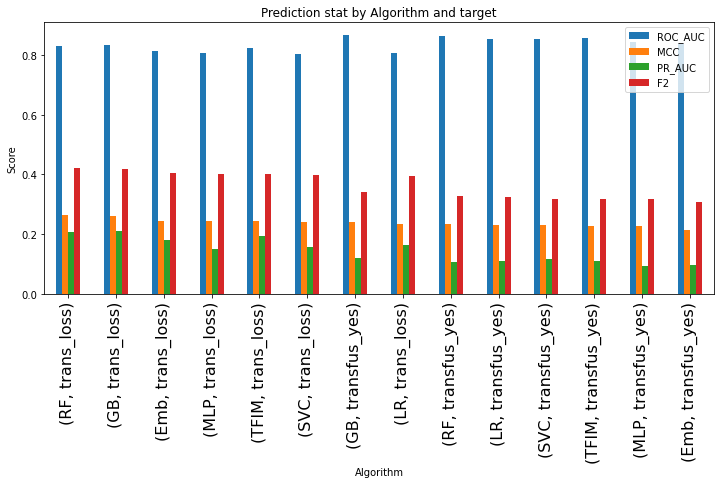

In [70]:
fig = plt.figure()
ax = pi_df_plot.plot.bar(figsize=(12,5), title="Prediction stat by Algorithm and target")
ax.set_ylabel("Score")
ax.set_xlabel("Algorithm")
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=16)
plt.show()
#ax.tick_params(axis='x',length=0)

# Define colors by Alg 

In [71]:
alg_colors = {'GB':'tab:blue',
              'RF':'tab:orange',
              'TFIM':'tab:green',
              'Emb':'tab:red',
              'LR':'tab:purple',
              'MLP':'tab:brown',
              'SVC':'tab:pink'}

In [72]:
from sklearn.metrics import roc_curve
def plot_roc(name, y_test, prob1, color, **kwargs):
    fpr, tpr, thresh = roc_curve(y_test, prob1)
    
    plt.plot(fpr, tpr, label=name, color=color, **kwargs)
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.grid(True)

# Resort by ROC_AUC 

In [73]:
pi_df_tl = pi_df_tl.sort_values('ROC_AUC', ascending=False)
pi_tl_files = pi_df_tl['base']
plt.rcParams["figure.figsize"] = (9, 7)

In [74]:
pi_tl_files

alg
GB                  /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
RF           /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
TFIM                                                     /MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
Emb                                            /slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
LR         /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
MLP     /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[64,32,16,8,4]_500_0_lbfgs-1-1.0
SVC          /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50

GB
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
RF
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
TFIM
/MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
Emb
/slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
LR
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
MLP
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[[]64,32,16,8,4]_500_0_lbfgs-1-1.0
SVC
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0


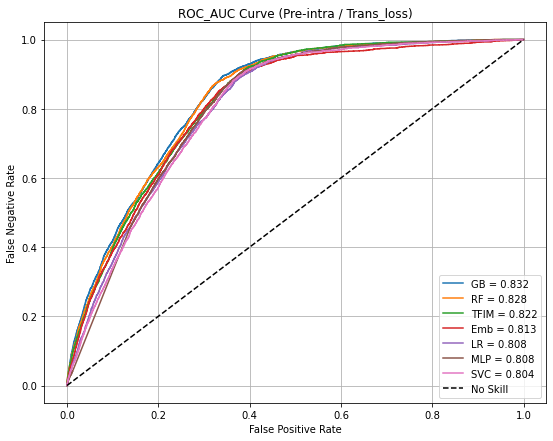

In [76]:
import glob
from sklearn.metrics import roc_auc_score
for alg, base in pi_tl_files.items():
    print(alg)
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    print(base)
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    roc = roc_auc_score(y_test, prob1)
    label = '{} = {:.3f}'.format(alg, roc)
    plot_roc(label, y_test, prob1, color=alg_colors[alg])

plt.plot([0,1],[0,1], linestyle='--', color='black', label='No Skill')
plt.title('ROC_AUC Curve (Pre-intra / Trans_loss)')
plt.legend(loc='lower right')

In [77]:
from sklearn.metrics import precision_recall_curve
def plot_pr_auc(name, precision, recall, color, **kwargs):
    plt.plot(recall, precision, label=name, color=color, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)

# Resort by PR_AUC 

In [78]:
pi_df_tl = pi_df_tl.sort_values('PR_AUC', ascending=False)
pi_tl_files = pi_df_tl['base']

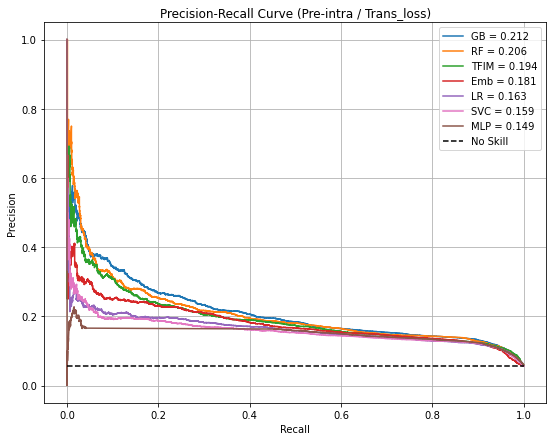

In [79]:
from sklearn.metrics import precision_recall_curve, auc
for alg, base in pi_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    precision, recall, thresh = precision_recall_curve(y_test, prob1)
    area = auc(recall, precision)
    label = '{} = {:.3f}'.format(alg, area)
    
    plot_pr_auc(label, precision, recall, color=alg_colors[alg])
    
no_skill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.title('Precision-Recall Curve (Pre-intra / Trans_loss)')
plt.legend(loc='upper right')

In [80]:
from sklearn.calibration import calibration_curve
def plot_calibration(name, y_test, prob1, color, bins=10, **kwargs):
    fop, mpv = calibration_curve(y_test, prob1, n_bins=bins)
    
    plt.plot(mpv, fop, label=name, color=color, **kwargs)
    plt.xlabel('Mean Predicted Value')
    plt.ylabel('Fraction of Positives')
    plt.grid(True)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


alg_bs: GB      0.179633
RF      0.144325
TFIM    0.170446
Emb     0.174272
LR      0.188021
SVC     0.189774
MLP     0.196123
dtype: float64
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
base: /MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-U

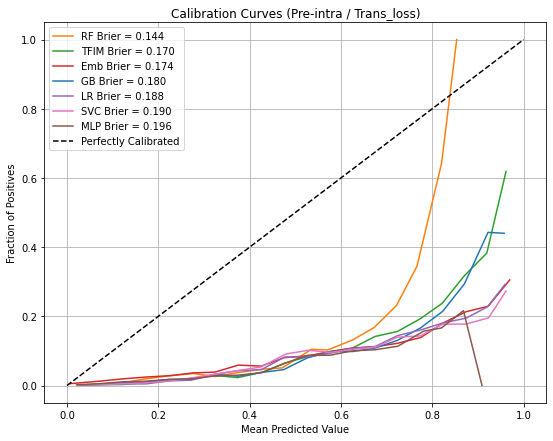

In [82]:
# Calibration curves
from sklearn.metrics import brier_score_loss
plt.rcParams["figure.figsize"] = (9, 7)
# First loop to sort by Brier Score
alg_bs = pd.Series()
for alg, basename in pi_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(basename)
    #print(f'base: {base}')
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    #print(f'prob1.shape: {prob1.shape}; y_test.shape: {y_test.shape}')
    brier_score = brier_score_loss(y_test, prob1)
    alg_bs[alg] = brier_score
    
print(f'alg_bs: {alg_bs}')    
alg_bs.sort_values(inplace=True)
for alg in alg_bs.index:
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(pi_tl_files[alg])
    print(f'base: {base}')
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    plot_name = '{} Brier = {:.3f}'.format(alg, alg_bs[alg])
    plot_calibration(plot_name, y_test, prob1, color=alg_colors[alg], bins=20)

plt.plot([0,1],[0,1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curves (Pre-intra / Trans_loss)')
plt.legend(loc='upper left')

# Repeat curves for Pre 

In [83]:
pre_df_tl = pre_df_tl.sort_values('ROC_AUC', ascending=False)
pre_tl_files = pre_df_tl['base']
plt.rcParams["figure.figsize"] = (9, 7)
pre_tl_files

alg
GB              /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-Pre-Union50-RAND-GB-0.05_11_12_50_900_250_7_0.85-1-1.0
RF           /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
Emb                                           /slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-Pre-Union50-RAND_ovr-Emb-64-20-3
MLP     /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-Pre-Union50-RAND-MLP-relu_1.0_[67,35,17,8,4]_500_0_adam-1-1.0
TFIM                                                    /MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-Pre-Union50-ClassWeight-TFIM-256-100-3
LR                      /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-Pre-Union50-RAND-LR-0.1_10000000_7_lbfgs-1-1.0
SVC         /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-Pre-Union50

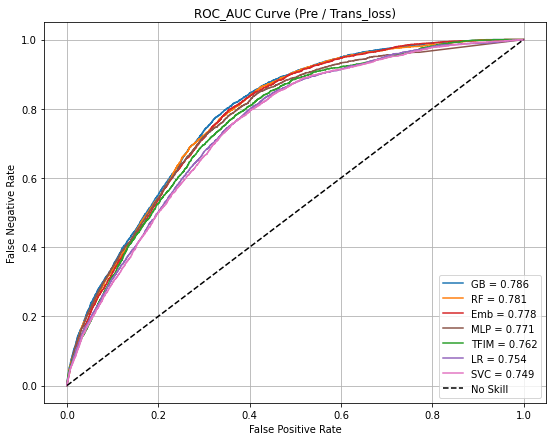

In [84]:
import glob
from sklearn.metrics import roc_auc_score
for alg, base in pre_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    roc = roc_auc_score(y_test, prob1)
    label = '{} = {:.3f}'.format(alg, roc)
    plot_roc(label, y_test, prob1, color=alg_colors[alg])

plt.plot([0,1],[0,1], linestyle='--', color='black', label='No Skill')
plt.title('ROC_AUC Curve (Pre / Trans_loss)')
plt.legend(loc='lower right')

In [85]:
pre_df_tl = pre_df_tl.sort_values('PR_AUC', ascending=False)
pre_tl_files = pre_df_tl['base']

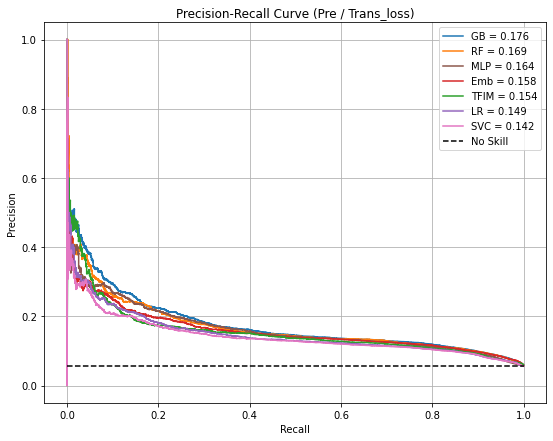

In [86]:
from sklearn.metrics import precision_recall_curve, auc
for alg, base in pre_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    precision, recall, thresh = precision_recall_curve(y_test, prob1)
    area = auc(recall, precision)
    label = '{} = {:.3f}'.format(alg, area)
    
    plot_pr_auc(label, precision, recall, color=alg_colors[alg])
    
no_skill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.title('Precision-Recall Curve (Pre / Trans_loss)')
plt.legend(loc='upper right')

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


alg_bs: GB      0.194413
RF      0.149896
MLP     0.184945
Emb     0.191969
TFIM    0.195067
LR      0.203809
SVC     0.203760
dtype: float64
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-Pre-Union50-RAND-MLP-relu_1.0_[[]67,35,17,8,4]_500_0_adam-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-Pre-Union50-RAND_ovr-Emb-64-20-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-Pre-Union50-RAND-GB-0.05_11_12_50_900_250_7_0.85-1-1.0
base: /MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-Pre-Union50-ClassWeight-TFIM-256-100-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-Pre-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/tran

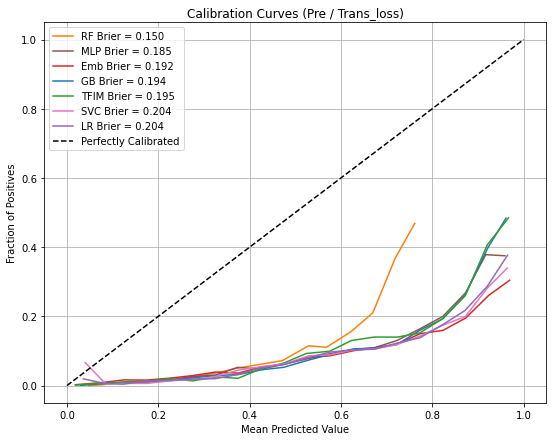

In [87]:
# Calibration curves
from sklearn.metrics import brier_score_loss
plt.rcParams["figure.figsize"] = (9, 7)
# First loop to sort by Brier Score
alg_bs = pd.Series()
for alg, basename in pre_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(basename)
    #print(f'base: {base}')
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    #print(f'prob1.shape: {prob1.shape}; y_test.shape: {y_test.shape}')
    brier_score = brier_score_loss(y_test, prob1)
    alg_bs[alg] = brier_score
    
print(f'alg_bs: {alg_bs}')    
alg_bs.sort_values(inplace=True)
for alg in alg_bs.index:
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(pre_tl_files[alg])
    print(f'base: {base}')
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')
    plot_name = '{} Brier = {:.3f}'.format(alg, alg_bs[alg])
    plot_calibration(plot_name, y_test, prob1, color=alg_colors[alg], bins=20)

plt.plot([0,1],[0,1], linestyle='--', color='black', label='Perfectly Calibrated')
plt.title('Calibration Curves (Pre / Trans_loss)')
plt.legend(loc='upper left')

# Probability histograms

In [88]:
def plot_prob_hist(name, prob1, bins=50, **kwargs):
    plt.hist(prob1, bins=50, **kwargs)
    plt.xlabel('Minority probability')
    plt.ylabel('Counts')
    plt.title('Alg: ' + alg)
    plt.grid(True)

In [89]:
pi_tl_files.shape[0]

7

base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7
base: /MFMDatasets/MFM_bopf/src/imbl/TFIM/output/trans_loss-PI-Union50-ClassWeight-TFIM-256-100-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/imbl/Emb/output/trans_loss-PI-Union50-RAND_und-Emb-32-20-3
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0
base: /slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[[]64,32,16,8,4]_500_0_lbfgs-1-1.0


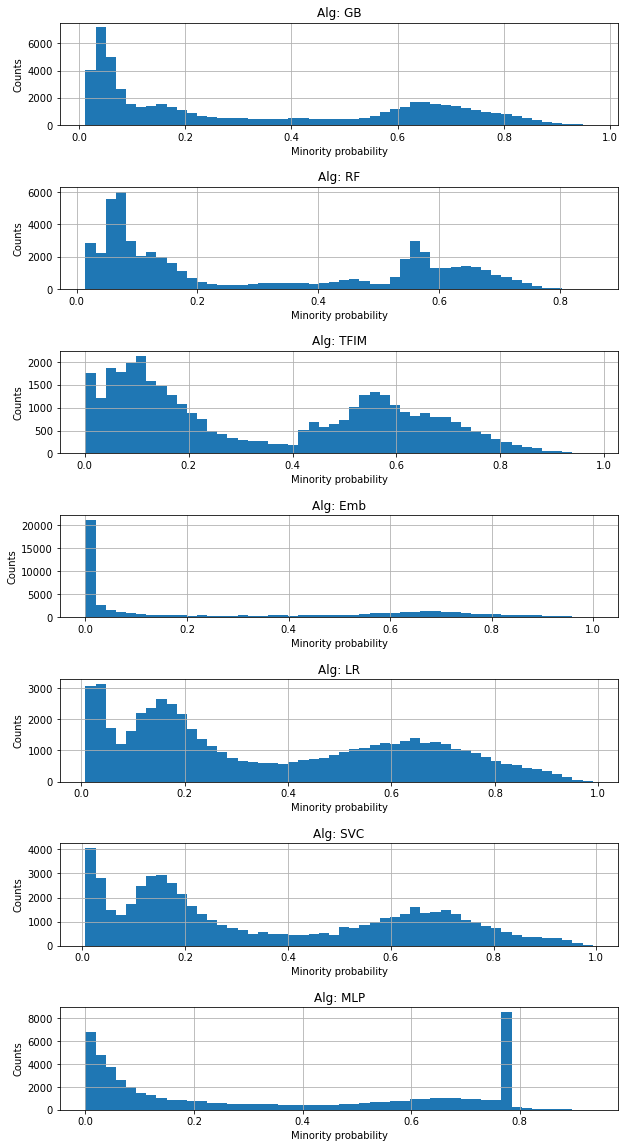

In [90]:
# Prob. histograms
plt.rcParams["figure.figsize"] = (10, 20)
row = 1
for alg, base in pi_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    print(f'base: {base}')
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    plt.subplot(pi_tl_files.shape[0], 1, row)
    plt.subplots_adjust(hspace=0.6)
    row += 1
    plot_prob_hist(alg, prob1, bins=50)


# Save probability files

In [91]:
prob_df = pd.DataFrame()
for alg, base in pi_tl_files.items():
    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
    base = glob.escape(base)
    probs = np.loadtxt(glob.glob(base + '*_probs.dat')[0], delimiter=',')
    if probs.ndim == 2:   # Kludgy fix because Emb only saves prob1
        prob1 = probs[:,1]
    else:
        prob1 = probs
    y_test, y_pred = np.loadtxt(glob.glob(base + '*_pred.dat')[0], delimiter=',')

    #print(f'alg: {alg}; prob1.shape: {prob1.shape}')
    prob_df = pd.DataFrame({'y_true':y_test,'y_pred':y_pred, 'prob1':prob1 })
    filename = outdir + alg + '_Predicted_probs.csv'
    #print(filename)    
    if out_flag:
        prob_df.to_csv(filename, index=None)
    else:
        print('out_flag is False; file not saved')
prob_df.head()

out_flag is False; file not saved
out_flag is False; file not saved
out_flag is False; file not saved
out_flag is False; file not saved
out_flag is False; file not saved
out_flag is False; file not saved
out_flag is False; file not saved


,y_true,y_pred,prob1
0,0.0,0.0,0.003108
1,0.0,0.0,0.020669
2,0.0,1.0,0.521569
3,0.0,1.0,0.823460
4,1.0,1.0,0.783734


# Top predictors

In [92]:
#pd.options.display.max_rows = 20
#coeffs_df = pd.DataFrame()
#coeffs_rank_df = pd.DataFrame()
#ML_algs = ['GB','LR','MLP','RF','SVC']
#for alg, base in pi_tl_files.items():
#    if alg not in ML_algs:
#        print(f'\nalg not included: {alg}\n')
#        continue
#        
#    # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
#    base = glob.escape(base)
#    dotout_file = glob.glob(base + '*.out')[0]
#    print(dotout_file)
#    with open(dotout_file, 'r') as file:
#        found_coef = False
#        coef_series = pd.Series()
#        ind_vars = []
#        coef_vals = []
#        for line in file:
#            if "coeffs =" in line:
#                found_coef = True
#                continue
#            
#            if found_coef:
#                var_coef = line.split()
#                if var_coef[0] != 'dtype:':
#                    ind_vars.append(var_coef[0])
#                    coef_vals.append(float(var_coef[1]))
#                
#        if found_coef:
#            if coeffs_df.empty:
#                coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[alg])
#                coeffs_rank_df = pd.DataFrame(data=coeffs_df[alg].rank(ascending=False).astype(int), columns=[alg])
#            else:
#                this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[alg])
#                this_rank_df = pd.DataFrame(data=this_df[alg].rank(ascending=False).astype(int), columns=[alg])
#                coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")
#                coeffs_rank_df = coeffs_rank_df.merge(this_rank_df, left_index=True, right_index=True, how="left")

#coeffs_df     

In [93]:
def find_coeffs(alg_files):
    coeffs_df = pd.DataFrame()
    ML_algs = ['GB','LR','MLP','RF','SVC']
    for alg, base in alg_files.items():
        if alg not in ML_algs:
                print(f'\nalg not included: {alg}\n')
                continue
        
        # Escape any special chars in base (like '['); need to do this BEFORE adding any wildcards
        base = glob.escape(base)
        dotout_file = glob.glob(base + '*.out')[0]
        print(dotout_file)
        with open(dotout_file, 'r') as file:
            found_coef = False
            coef_series = pd.Series()
            ind_vars = []
            coef_vals = []
            for line in file:
                if "coeffs =" in line:
                    found_coef = True
                    continue

                if found_coef:
                    var_coef = line.split()
                    if var_coef[0] != 'dtype:':
                        ind_vars.append(var_coef[0])
                        coef_vals.append(float(var_coef[1]))

            if found_coef:
                if coeffs_df.empty:
                    coeffs_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[alg])
                else:
                    this_df = pd.DataFrame(data=coef_vals, index=ind_vars, columns=[alg])
                    this_rank_df = pd.DataFrame(data=this_df[alg].rank(ascending=False).astype(int), columns=[alg])
                    coeffs_df = coeffs_df.merge(this_df, left_index=True, right_index=True, how="left")

                    
    return coeffs_df     

In [94]:
pi_tl_coeffs = find_coeffs(pi_tl_files)
pi_tl_coeffs

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-PI-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.9-1-1.0-20210412_180116.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-PI-Union50-RAND-RF-None_gini_40_auto_100_16_2_128_7-1-0.7-20210430_140223.out

alg not included: TFIM


alg not included: Emb

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-PI-Union50-RAND-LR-0.01_balanced_10000000_7_liblinear-1-0.5-20210430_113551.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0-20210408_182257.out


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-PI-Union50-RAND-MLP-relu_1.0_[64,32,16,8,4]_500_0_lbfgs-1-1.0-20210408_152440.out


,GB,RF,LR,SVC,MLP
Delmode,0.223610,0.232976,0.719759,0.679865,0.177034
Inoxy_incrdose,0.085424,0.060503,0.063165,0.086528,0.114368
Intratocolytix,0.071374,0.055581,0.102908,0.124213,0.128566
HosEpiNurse,0.063762,0.018728,0.397890,0.685999,0.124552
Hostype,0.044927,0.018891,0.051853,0.071380,0.106490
TrialLabor,0.043558,0.031755,0.023946,0.268537,0.103287
Insurance,0.033360,0.029219,0.189790,0.203486,0.112390
DMControl,0.026632,0.032303,0.074411,0.072145,0.112124
Education,0.025702,0.030404,0.063260,0.040917,0.103478
HxnumCS,0.021466,0.023875,0.009392,0.006844,0.125057


In [95]:
pi_tl_coeffs.sum(axis=0)

GB      1.000000
RF      1.000001
LR      9.225633
SVC    12.294987
MLP     7.301828
dtype: float64

In [96]:
pi_tl_norm_coeffs = pi_tl_coeffs.div(pi_tl_coeffs.sum(axis=0), axis=1)
pi_tl_norm_coeffs.sum()

GB     1.0
RF     1.0
LR     1.0
SVC    1.0
MLP    1.0
dtype: float64

In [97]:
pi_tl_norm_coeffs

,GB,RF,LR,SVC,MLP
Delmode,0.223610,0.232976,0.078017,0.055296,0.024245
Inoxy_incrdose,0.085424,0.060503,0.006847,0.007038,0.015663
Intratocolytix,0.071374,0.055581,0.011155,0.010103,0.017607
HosEpiNurse,0.063762,0.018728,0.043129,0.055795,0.017058
Hostype,0.044927,0.018891,0.005621,0.005806,0.014584
TrialLabor,0.043558,0.031755,0.002596,0.021841,0.014145
Insurance,0.033360,0.029219,0.020572,0.016550,0.015392
DMControl,0.026632,0.032303,0.008066,0.005868,0.015356
Education,0.025702,0.030404,0.006857,0.003328,0.014172
HxnumCS,0.021466,0.023875,0.001018,0.000557,0.017127


['Delmode' 'Inoxy_incrdose' 'Intratocolytix' 'HosEpiNurse' 'Hostype'
 'TrialLabor' 'Insurance' 'DMControl' 'Education' 'HxnumCS' 'Hxanemia'
 'Admcontract' 'ROMmeth' 'CS_FTP' 'momrace_new' 'AdmDBP' 'AdmSBP'
 'Admpresent' 'HosEpitype' 'AdmBishop' 'BESTGA' 'CS_NRFHT' 'Lac_Min'
 'HospElectInd' 'IntraMgSO']


<Figure size 720x1440 with 0 Axes>

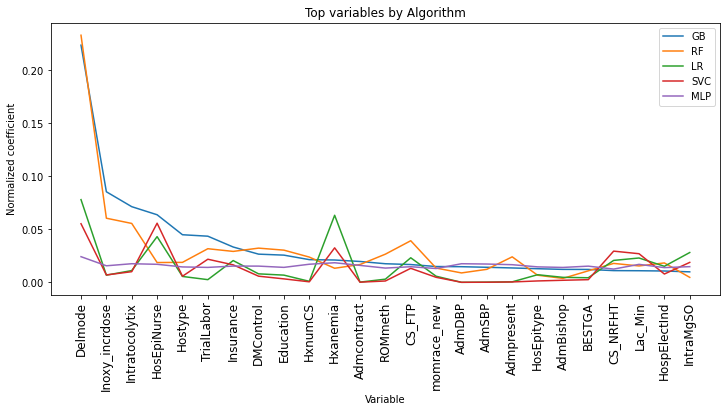

In [98]:
fig = plt.figure()
num_labels = 25
x_labels = pi_tl_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pi_tl_norm_coeffs.iloc[0:num_labels,:].plot(figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['Delmode' 'Inoxy_incrdose' 'Intratocolytix' 'HosEpiNurse' 'Hostype'
 'TrialLabor' 'Insurance' 'DMControl' 'Education' 'HxnumCS' 'Hxanemia'
 'Admcontract' 'ROMmeth' 'CS_FTP' 'momrace_new' 'AdmDBP' 'AdmSBP'
 'Admpresent' 'HosEpitype' 'AdmBishop' 'BESTGA' 'CS_NRFHT' 'Lac_Min'
 'HospElectInd' 'IntraMgSO']


<Figure size 720x1440 with 0 Axes>

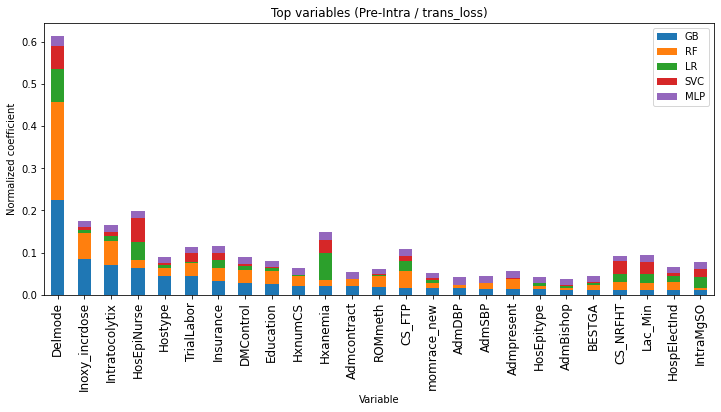

In [99]:
fig = plt.figure()
num_labels = 25
x_labels = pi_tl_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pi_tl_norm_coeffs.iloc[0:num_labels,:].plot.bar(stacked=True, figsize=(12,5), title="Top variables (Pre-Intra / trans_loss)")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['Inoxy_incrdose' 'Intratocolytix' 'HosEpiNurse' 'Hostype' 'TrialLabor'
 'Insurance' 'DMControl' 'Education' 'HxnumCS' 'Hxanemia' 'Admcontract'
 'ROMmeth' 'CS_FTP' 'momrace_new' 'AdmDBP']


<Figure size 720x1440 with 0 Axes>

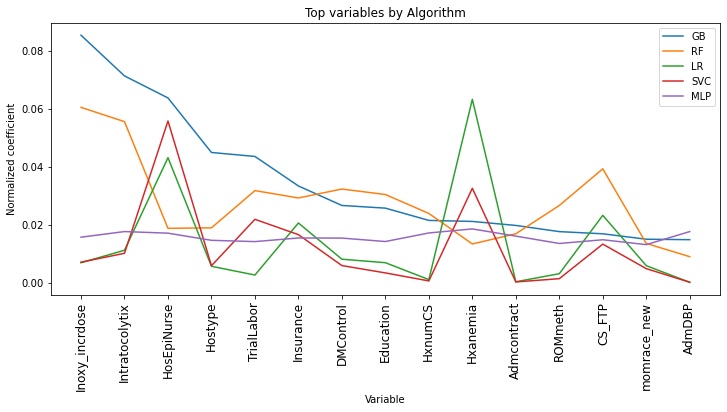

In [100]:
fig = plt.figure()
num_labels = 15
x_labels = pi_tl_norm_coeffs.index[1:num_labels+1].values
print(x_labels)
ax = pi_tl_norm_coeffs.iloc[1:num_labels+1,:].plot(figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['Inoxy_incrdose' 'Intratocolytix' 'HosEpiNurse' 'Hostype' 'TrialLabor'
 'Insurance' 'DMControl' 'Education' 'HxnumCS' 'Hxanemia' 'Admcontract'
 'ROMmeth' 'CS_FTP' 'momrace_new' 'AdmDBP']


<Figure size 720x1440 with 0 Axes>

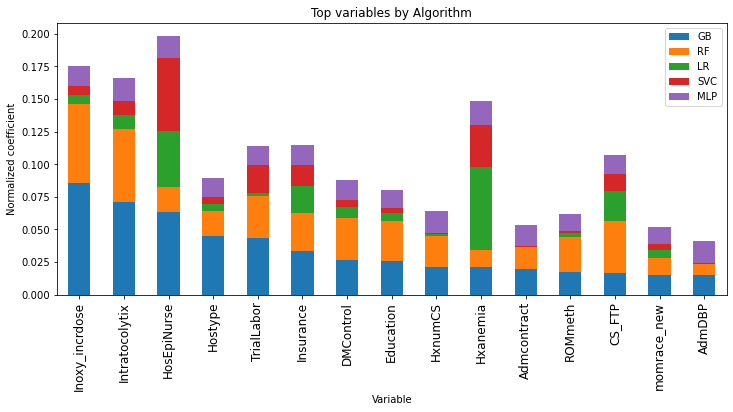

In [101]:
fig = plt.figure()
num_labels = 15
x_labels = pi_tl_norm_coeffs.index[1:num_labels+1].values
print(x_labels)
ax = pi_tl_norm_coeffs.iloc[1:num_labels+1,:].plot.bar(stacked=True, figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

# Repeat for pi_ty
### Should consider putting this in a loop, but need to parameterize the Titles

In [102]:
pi_ty_files = pi_df_ty['base']
pi_ty_coeffs = find_coeffs(pi_ty_files)
pi_ty_coeffs

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-PI-Union50-RAND-GB-0.05_11_12_50_900_100_7_0.85-1-0.5-20210426_130014.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-PI-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7-20210430_135943.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-PI-Union50-RAND-LR-0.1_None_10000000_7_liblinear-1-0.7-20210430_113500.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-PI-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0-20210408_175657.out

alg not included: TFIM

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-PI-Union50-RAND-MLP-relu_1.0_[68,32,16,4]_500_0_adam-1-1.0-20210408_145100.out

alg not included: Emb



/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,GB,RF,LR,SVC,MLP
Intratocolytix,0.144148,0.123014,0.222484,0.250098,0.042347
HosEpiNurse,0.106409,0.050621,1.642484,1.494608,0.024864
DMControl,0.097874,0.061386,0.011785,0.012239,0.012700
Education,0.091430,0.091337,0.079453,0.031235,0.019747
Inoxy_incrdose,0.088798,0.101882,0.117774,0.062200,0.032294
Hostype,0.050338,0.030861,0.207167,0.031500,0.020397
GAmethod,0.040360,0.039393,0.069399,0.103193,0.028970
HospElectCS,0.033428,0.046109,0.095029,0.101400,0.011366
Hxanemia,0.030777,0.016016,1.308445,0.776308,0.056037
IntraMgSO,0.026055,0.014069,0.738133,0.619992,0.020402


In [103]:
pi_ty_norm_coeffs = pi_ty_coeffs.div(pi_ty_coeffs.sum(axis=0), axis=1)
pi_ty_norm_coeffs.sum()

GB     1.0
RF     1.0
LR     1.0
SVC    1.0
MLP    1.0
dtype: float64

['Intratocolytix' 'HosEpiNurse' 'DMControl' 'Education' 'Inoxy_incrdose'
 'Hostype' 'GAmethod' 'HospElectCS' 'Hxanemia' 'IntraMgSO' 'Delmode'
 'momrace_new' 'intra_abruptio' 'BESTGA' 'Admcontract' 'Analgesia'
 'AdmSBP' 'Intrafever' 'Admconsistency' 'AdmDBP' 'Anteanemia'
 'HospElectInd' 'intra_previa' 'Admefface' 'Insurance']


<Figure size 720x1440 with 0 Axes>

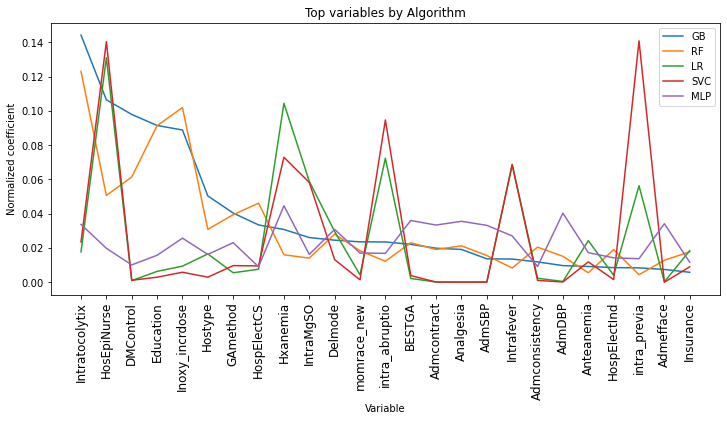

In [104]:
fig = plt.figure()
num_labels = 25
x_labels = pi_ty_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pi_ty_norm_coeffs.iloc[0:num_labels,:].plot(figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['Intratocolytix' 'HosEpiNurse' 'DMControl' 'Education' 'Inoxy_incrdose'
 'Hostype' 'GAmethod' 'HospElectCS' 'Hxanemia' 'IntraMgSO' 'Delmode'
 'momrace_new' 'intra_abruptio' 'BESTGA' 'Admcontract' 'Analgesia'
 'AdmSBP' 'Intrafever' 'Admconsistency' 'AdmDBP' 'Anteanemia'
 'HospElectInd' 'intra_previa' 'Admefface' 'Insurance']


<Figure size 720x1440 with 0 Axes>

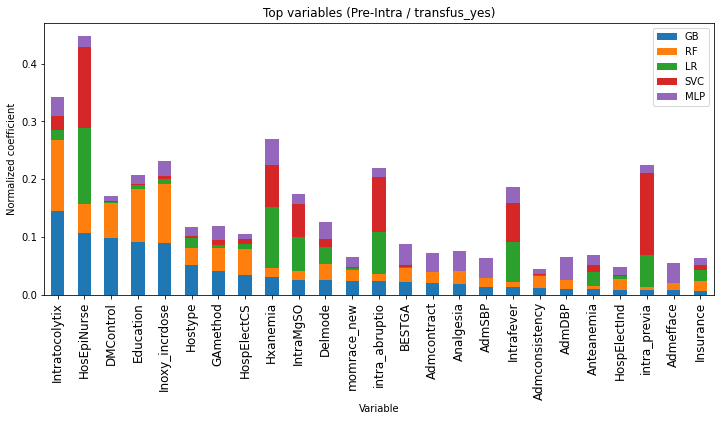

In [105]:
fig = plt.figure()
num_labels = 25
x_labels = pi_ty_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pi_ty_norm_coeffs.iloc[0:num_labels,:].plot.bar(stacked=True, figsize=(12,5), title="Top variables (Pre-Intra / transfus_yes)")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

# Repeat for pre_ty
### Should consider putting this in a loop, but need to parameterize the Titles

In [106]:
pre_ty_files = pre_df_ty['base']
pre_ty_coeffs = find_coeffs(pre_ty_files)
pre_ty_coeffs

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/transfus_yes-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.9-20210430_140019.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/transfus_yes-Pre-Union50-RAND-GB-0.1_11_12_50_900_70_7_0.75-1-1.0-20210412_180050.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/transfus_yes-Pre-Union50-RAND-MLP-relu_1.0_[100,50]_500_0_adam-1-1.0-20210408_145513.out

alg not included: Emb


alg not included: TFIM

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/transfus_yes-Pre-Union50-RAND-LR-1_None_10000000_7_liblinear-1-0.7-20210430_113500.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/transfus_yes-Pre-Union50-RAND-SVC-100_0_scale_linear_100000000_1_7-1-1.0-20210408_175915.out


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,RF,GB,MLP,LR,SVC
Education,0.162276,0.235266,0.030024,0.248017,0.266368
DMControl,0.156041,0.185591,0.034666,0.217765,0.276711
HospElectCS,0.115019,0.067219,0.023490,0.383602,0.164404
Hostype,0.087705,0.040149,0.050089,0.581680,0.266627
HxnumCS,0.068800,0.072587,0.014275,0.032880,0.016196
HospElectInd,0.057465,0.087570,0.042373,0.036472,0.022400
momrace_new,0.052216,0.052604,0.027816,0.063409,0.038296
Insurance,0.043249,0.053466,0.020792,0.337763,0.223801
Admreason,0.026012,0.005824,0.021275,0.016256,0.006211
Hxanemia,0.020779,0.026549,0.028786,0.785740,0.424798


In [107]:
pre_ty_norm_coeffs = pre_ty_coeffs.div(pre_ty_coeffs.sum(axis=0), axis=1)
pre_ty_norm_coeffs.sum()

RF     1.0
GB     1.0
MLP    1.0
LR     1.0
SVC    1.0
dtype: float64

['Education' 'DMControl' 'HospElectCS' 'Hostype' 'HxnumCS' 'HospElectInd'
 'momrace_new' 'Insurance' 'Admreason' 'Hxanemia' 'Antesteroid' 'Marital'
 'PostHBP' 'Anteabruption' 'Ind_elect' 'Parity' 'prelaborCD' 'Anteanemia'
 'Antebleed3' 'Anteprevia' 'high_Gravidity' 'high_height' 'Hxcsection'
 'Hyp_beta' 'Preeclampsia']


<Figure size 720x1440 with 0 Axes>

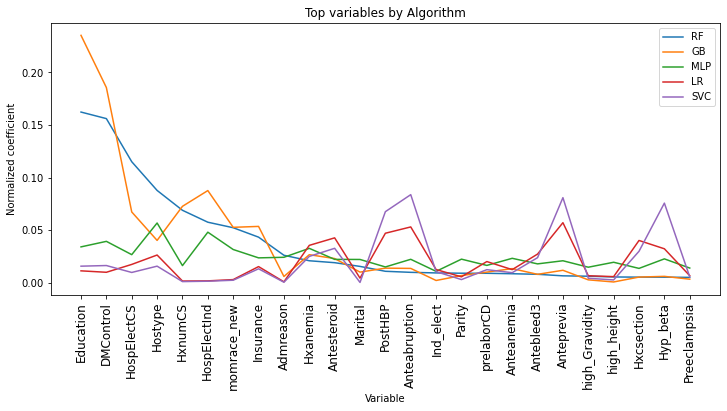

In [108]:
fig = plt.figure()
num_labels = 25
x_labels = pre_ty_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pre_ty_norm_coeffs.iloc[0:num_labels,:].plot(figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['Education' 'DMControl' 'HospElectCS' 'Hostype' 'HxnumCS' 'HospElectInd'
 'momrace_new' 'Insurance' 'Admreason' 'Hxanemia' 'Antesteroid' 'Marital'
 'PostHBP' 'Anteabruption' 'Ind_elect' 'Parity' 'prelaborCD' 'Anteanemia'
 'Antebleed3' 'Anteprevia' 'high_Gravidity' 'high_height' 'Hxcsection'
 'Hyp_beta' 'Preeclampsia']


<Figure size 720x1440 with 0 Axes>

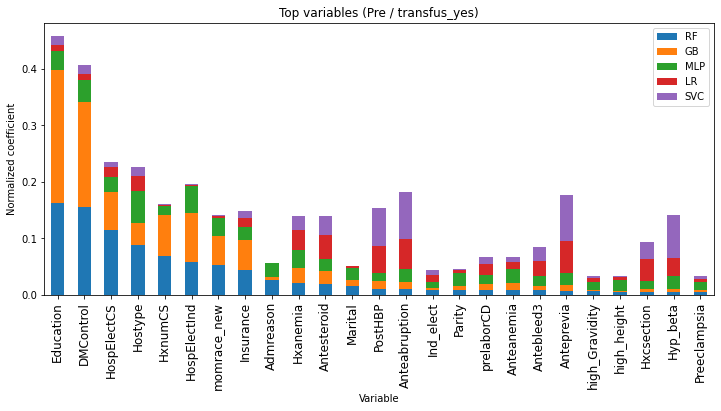

In [109]:
fig = plt.figure()
num_labels = 25
x_labels = pre_ty_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pre_ty_norm_coeffs.iloc[0:num_labels,:].plot.bar(stacked=True, figsize=(12,5), title="Top variables (Pre / transfus_yes)")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

# Repeat for pre_tl
### Should consider putting this in a loop, but need to parameterize the Titles

In [110]:
pre_tl_files = pre_df_tl['base']
pre_tl_coeffs = find_coeffs(pre_tl_files)
pre_tl_coeffs

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/GB/output/trans_loss-Pre-Union50-RAND-GB-0.05_11_12_50_900_250_7_0.85-1-1.0-20210412_181405.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/RF/output/trans_loss-Pre-Union50-RAND-RF-None_gini_40_auto_100_1_2_128_7-1-0.7-20210430_140221.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/MLP/output/trans_loss-Pre-Union50-RAND-MLP-relu_1.0_[67,35,17,8,4]_500_0_adam-1-1.0-20210408_145703.out

alg not included: Emb


alg not included: TFIM

/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/LR/output/trans_loss-Pre-Union50-RAND-LR-0.1_10000000_7_lbfgs-1-1.0-20210407_114504.out
/slurm_storage/mbopf/projects/MFM_bopf/src/multi_predict/SVC/output/trans_loss-Pre-Union50-RAND-SVC-1_0_scale_linear_100000000_1_7-1-1.0-20210408_175042.out


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,GB,RF,MLP,LR,SVC
HxnumCS,0.119392,0.092695,0.014896,0.019675,0.018341
Insurance,0.096098,0.087109,0.018926,0.226478,0.145479
prelaborCD,0.080832,0.084606,0.026955,0.799400,0.970562
DMControl,0.065030,0.079276,0.032705,0.154798,0.173264
Education,0.058851,0.070332,0.028804,0.119175,0.178097
Hxanemia,0.047428,0.048887,0.021104,0.704535,0.790113
Antefetdistress,0.046855,0.045275,0.024235,0.890905,1.087155
momrace_new,0.036593,0.024966,0.027486,0.057548,0.047374
HospElectCS,0.036443,0.048301,0.021691,0.085448,0.098804
Hostype,0.033404,0.045466,0.028860,0.199262,0.309751


In [111]:
pre_tl_norm_coeffs = pre_tl_coeffs.div(pre_tl_coeffs.sum(axis=0), axis=1)
pre_tl_norm_coeffs.sum()

GB     1.0
RF     1.0
MLP    1.0
LR     1.0
SVC    1.0
dtype: float64

['HxnumCS' 'Insurance' 'prelaborCD' 'DMControl' 'Education' 'Hxanemia'
 'Antefetdistress' 'momrace_new' 'HospElectCS' 'Hostype' 'Admreason'
 'HospElectInd' 'Parity' 'uscar' 'Hxcsection' 'Anteprevia' 'CS_UScar'
 'Anteanemia' 'Marital' 'Antesteroid' 'Anteabruption' 'CS_Elect'
 'high_BMI' 'AnteCHBP' 'high_Age']


<Figure size 720x1440 with 0 Axes>

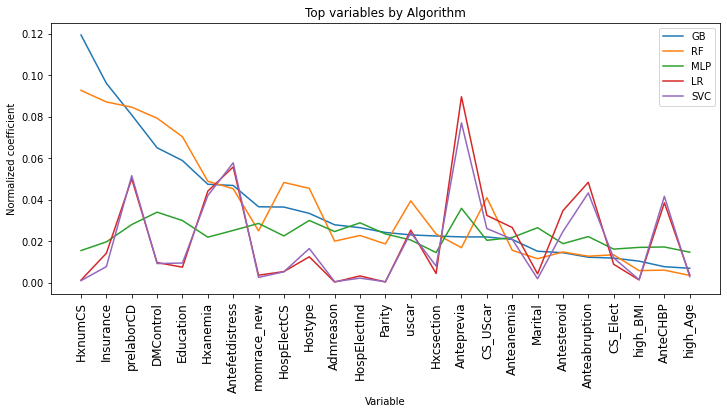

In [112]:
fig = plt.figure()
num_labels = 25
x_labels = pre_tl_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pre_tl_norm_coeffs.iloc[0:num_labels,:].plot(figsize=(12,5), title="Top variables by Algorithm")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()

['HxnumCS' 'Insurance' 'prelaborCD' 'DMControl' 'Education' 'Hxanemia'
 'Antefetdistress' 'momrace_new' 'HospElectCS' 'Hostype' 'Admreason'
 'HospElectInd' 'Parity' 'uscar' 'Hxcsection' 'Anteprevia' 'CS_UScar'
 'Anteanemia' 'Marital' 'Antesteroid' 'Anteabruption' 'CS_Elect'
 'high_BMI' 'AnteCHBP' 'high_Age']


<Figure size 720x1440 with 0 Axes>

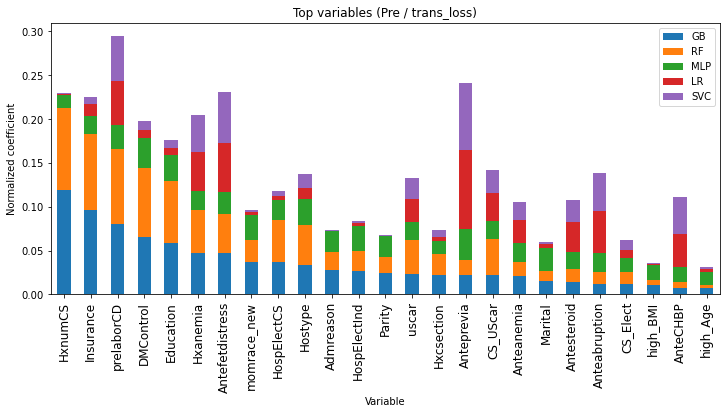

In [113]:
fig = plt.figure()
num_labels = 25
x_labels = pre_tl_norm_coeffs.index[0:num_labels].values
print(x_labels)
ax = pre_tl_norm_coeffs.iloc[0:num_labels,:].plot.bar(stacked=True, figsize=(12,5), title="Top variables (Pre / trans_loss)")
ax.set_ylabel("Normalized coefficient")
ax.set_xlabel("Variable")
ax.set_xticks(range(num_labels))
ax.set_xticklabels(x_labels)
plt.draw()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
#ax.set_xticks(ax.get_xticks(), rotation=90, fontsize=12)
plt.show()